# Network inference of categorical variables: non-sequential data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fem
%matplotlib inline

In [2]:
n, m = 10, 3
w = fem.discrete.model_parameters(n, m)

In [3]:
w_flat = np.hstack([wi for wi in w.itervalues()]).flatten()

In [4]:
x = fem.discrete.time_series(w, n, m, o=4.0)

In [21]:
print(x)

[[0 0 2 ... 1 0 2]
 [2 0 1 ... 1 1 0]
 [2 2 0 ... 1 0 2]
 ...
 [0 1 0 ... 0 2 2]
 [1 2 0 ... 1 0 1]
 [1 0 1 ... 0 1 2]]


In [5]:
model = fem.discrete.model()
x1, x2 = x[:, :-1], x[:, 1:]
model.fit(x1, x2)

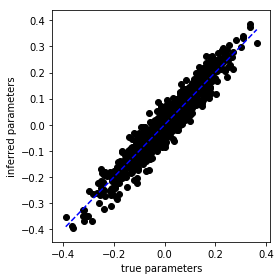

In [6]:
w_fit_flat = np.hstack([wi for wi in model.w.itervalues()]).flatten()

fig = plt.figure(figsize=(4,4))
ax = plt.gca()

ax.scatter(w_flat, w_fit_flat, c='k')
lo, hi = w_flat.min(), w_flat.max()
grid = np.linspace(lo, hi)
ax.plot(grid, grid, 'b--')
ax.set_xlabel('true parameters')
ax.set_ylabel('inferred parameters')

plt.tight_layout()
plt.show()

In [8]:
print(w_fit_flat.shape)

(900,)


In [11]:
print(w[1].shape)

(30, 30)


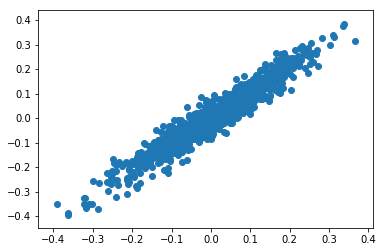

In [19]:
plt.scatter(w[1].reshape(30,30),w_fit_flat.reshape(30,30))
plt.show()